## CUSTOMER CHURN PREDICTION

Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### Understanding the Problem Statement


* In the domain of e-commerce, acquiring a new customer is generally more expensive than keeping the existing ones. The customers usually leave if they do not get good incentives. Thus, analyzing customer behavior to predict customer churn and the reasons can be a great solution for businesses especially small businesses and startups to monitor customer behavior and offer a suitable incentive that could help in maintaining the customers. In Saudi Arabia, most of the e-commerce platforms don’t offer an analytics tool for the traders to help them analyze the customer behavior which lead them to close their stores at the end. Therefore, offering a tool that can help them to analyze customer behavior will be a great contribution.

### Data Collection

* Dataset source - https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
* The dataset consists of 20 columns and 5630 rows.

### Import the data and required packages.

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/dataset_original.csv")

##### Show the top 5 records

In [3]:
df.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,50002,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,50003,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,50005,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1


##### Shape of the dataset

In [4]:
df.shape

(5630, 20)

#### Dataset Information

* CustomerID:- Unique customer ID
* Churn:- Churn Flag
* Tenure:- Tenure of customer in organization
* PreferredLoginDevice:- Preferred login device of customer
* CityTier:- City tier
* WarehouseToHome:- Distance in between warehouse to home of customer
* PreferredPaymentMode:- Preferred payment method of customer
* Gender:- Gender of customer
* HourSpendOnApp:- Number of hours spend on mobile application or website
* NumberOfDeviceRegistered:- Total number of deceives is registered on particular customer
* PreferedOrderCat:- Preferred order category of customer in last month
* SatisfactionScore:- Satisfactory score of customer on service
* MaritalStatus:- Marital status of customer
* NumberOfAddress:- Total number of added added on particular customer
* Complain:- Any complaint has been raised in last month
* OrderAmountHikeFromlastYear:- Percentage increases in order from last year
* CouponUsed:- Total number of coupon has been used in last month
* OrderCount:- Total number of orders has been places in last month
* DaySinceLastOrder:- Day Since last order by customer
* CashbackAmount:- Average cashback in last month

#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column


#### Check Missing values

In [5]:
df.isnull().sum()

CustomerID                       0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
Churn                            0
dtype: int64

In [6]:
null = df.isnull().sum()
null_values = null[null > 0]
null_values

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

* There are some missing values in dataset 
* To fill with the help of mean of that column

In [7]:
df = df.fillna(df.mean())
df.isnull().sum()

CustomerID                     0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

* There is no null values in the dataset 
* If in case of any null values present in the categorical features to use the **Most frequent values or use Mode** of that columns

#### Check Duplicate values

In [8]:
df.duplicated().sum()

0

There are no duplicated values in the dataset

#### Check the data types

In [9]:
#check the null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

####  Check the number of unique values of each column


In [10]:
df.nunique()

CustomerID                     5630
Tenure                           37
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  35
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    7
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      17
CouponUsed                       18
OrderCount                       17
DaySinceLastOrder                23
CashbackAmount                  220
Churn                             2
dtype: int64

#####  Check statistics of data set

In [11]:
df.describe()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492,0.168384
std,1625.385339,8.354164,0.915389,8.339095,0.705384,1.023999,1.380194,2.583586,0.451408,3.587926,1.851038,2.871521,3.553382,49.193869,0.374240
min,50001.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000,0.000000
50%,52815.500000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,4.000000,163.000000,0.000000
75%,54222.750000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.008004,7.000000,196.000000,0.000000
max,55630.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000,1.000000


#### Insights

* From above description of numerical data, all means are very close to each other - between 3 and 177.67
* All standard deviations are also close - between 0.4 to 49.89
* And there are some outliers also.

####  Exploring Data

In [12]:
df.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,50002,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,50003,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,50004,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,50005,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1


we don't need the custmer Id columns so removing.

In [13]:
df.drop(columns='CustomerID',axis=1,inplace=True)

In [14]:
df.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1


In [15]:
numeric_columns = df.select_dtypes(exclude="object")

In [16]:
categorical_column = df.select_dtypes(include="object")

In [17]:
print("Categories in 'PreferredLoginDevice' variable:  ",end=" ")
print(df["PreferredLoginDevice"].unique())

print("Categories in 'PreferredPaymentMode' variable:  ",end=" ")
print(df["PreferredPaymentMode"].unique())

print("Categories in 'Gender' variable:  ",end=" ")
print(df["Gender"].unique())

print("Categories in 'PreferedOrderCat' variable:  ",end=" ")
print(df["PreferedOrderCat"].unique())

print("Categories in 'MaritalStatus' variable:  ",end=" ")
print(df["MaritalStatus"].unique())

Categories in 'PreferredLoginDevice' variable:   ['Mobile Phone' 'Phone' 'Computer']
Categories in 'PreferredPaymentMode' variable:   ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Categories in 'Gender' variable:   ['Female' 'Male']
Categories in 'PreferedOrderCat' variable:   ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Categories in 'MaritalStatus' variable:   ['Single' 'Divorced' 'Married']


In [18]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 14 numerical features: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']
We have 5 categorical features: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [19]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [20]:
percentage = df['Churn'].value_counts(normalize=True)*100
percentage

0    83.161634
1    16.838366
Name: Churn, dtype: float64

* From the above Dependent feature is imbalace data are present
* This will give some effect in the accuracy and F1 score

<Axes: xlabel='Churn', ylabel='count'>

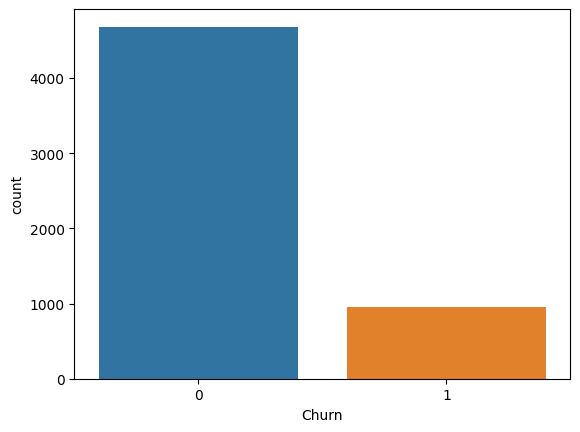

In [21]:
sns.countplot(data=df,x=df['Churn'])

##### Data Visualization
* Histogram

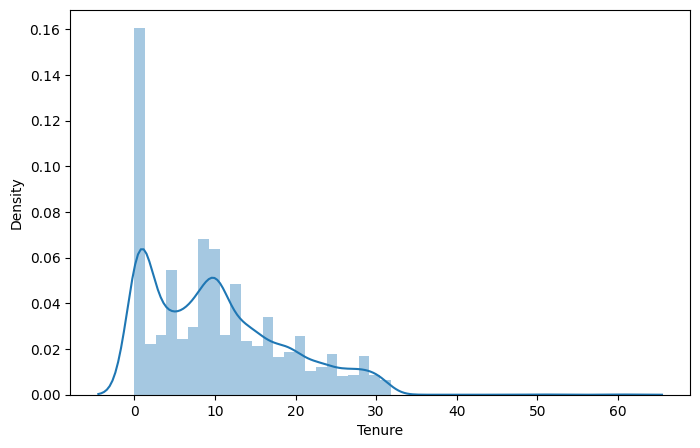

In [22]:
plt.figure(figsize=(8,5))
sns.distplot(df['Tenure'])
plt.show()

* The above Tenure feature is distributed to **positively skewed** so we perform the data tranforming technique.

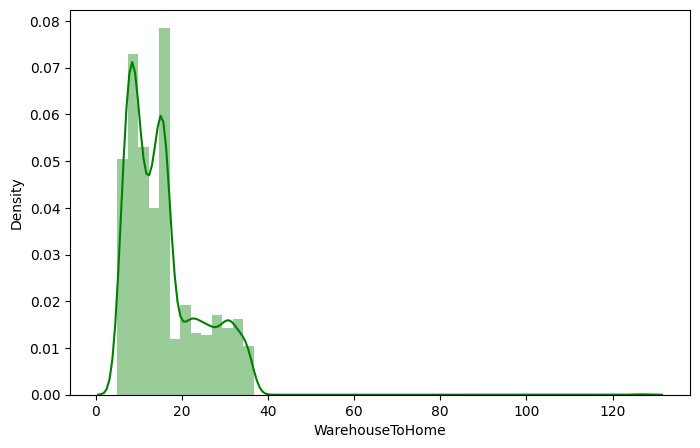

In [23]:
plt.figure(figsize=(8,5))
sns.distplot(df['WarehouseToHome'],color='green')
plt.show()

* The above WarehouseToHome feature is distributed to **positively skewed** so we perform the data tranforming technique.

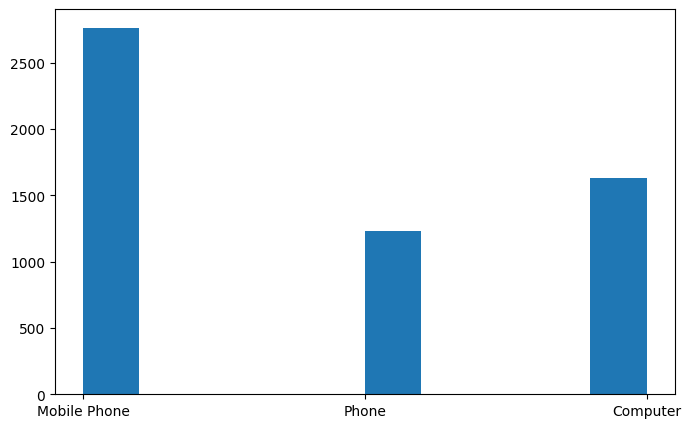

In [24]:
plt.figure(figsize=(8,5))
plt.hist(x = df['PreferredLoginDevice'])
plt.show()

* From the hist plot is to know the how many devices are present in the dataset
* Mobile phone is 3000 values, phone is 1200, computer is 1800 values

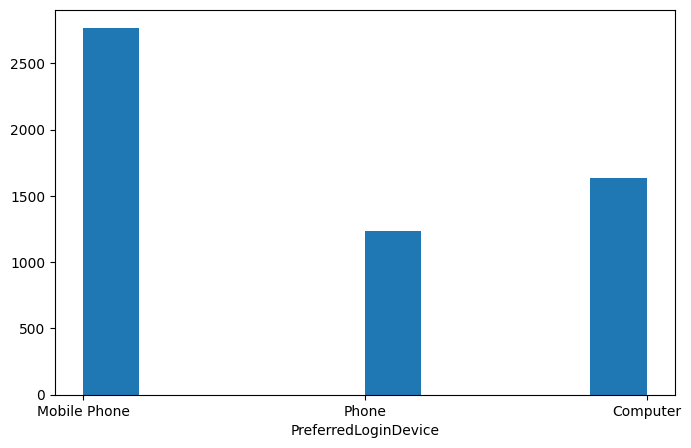

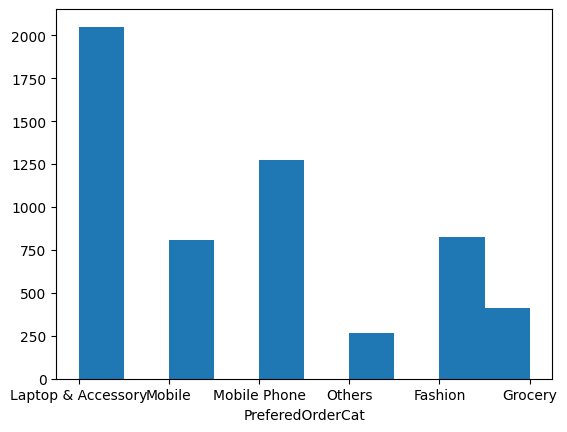

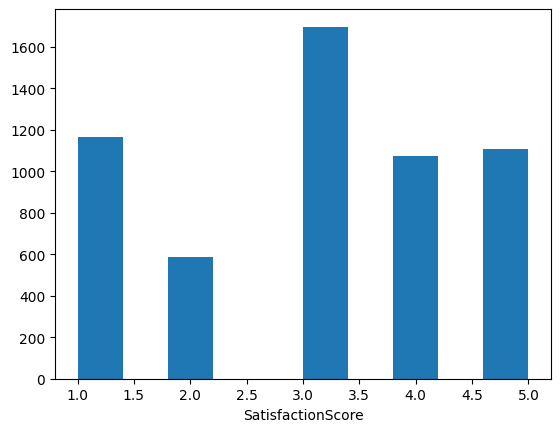

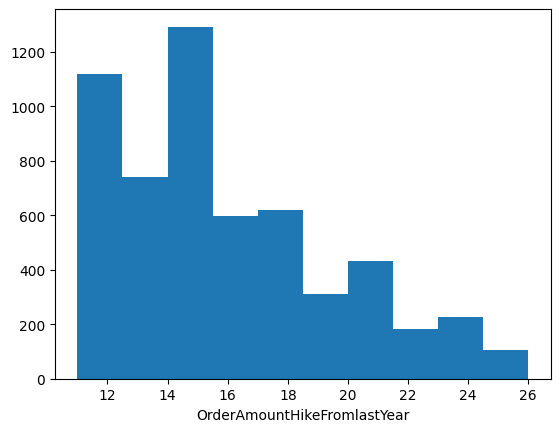

In [25]:
plt.figure(figsize=(8,5))
plt.hist(x = df['PreferredLoginDevice'])
plt.xlabel("PreferredLoginDevice")
plt.show()


plt.hist(x = df['PreferedOrderCat'])
plt.xlabel("PreferedOrderCat")
plt.show()


plt.hist(x = df['SatisfactionScore'])
plt.xlabel("SatisfactionScore")
plt.show()

plt.hist(x = df['OrderAmountHikeFromlastYear'])
plt.xlabel("OrderAmountHikeFromlastYear")
plt.show()

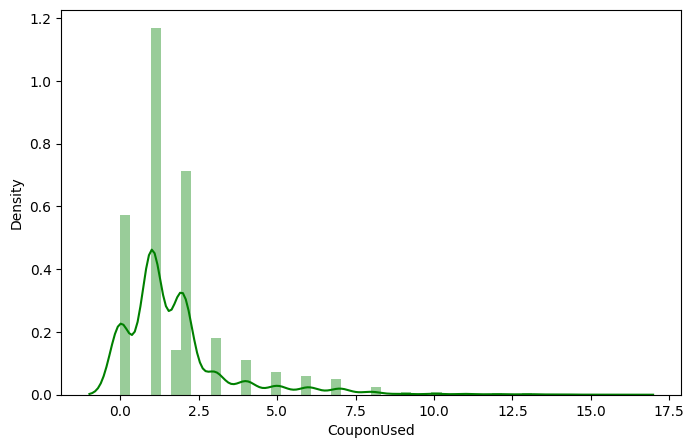

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(df['CouponUsed'],color='green')
plt.show()

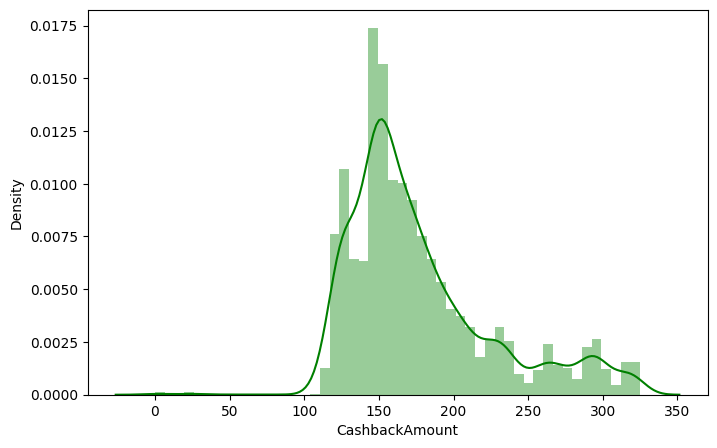

In [27]:
plt.figure(figsize=(8,5))
sns.distplot(df['CashbackAmount'],color='green')
plt.show()



##### 4.4.1 GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

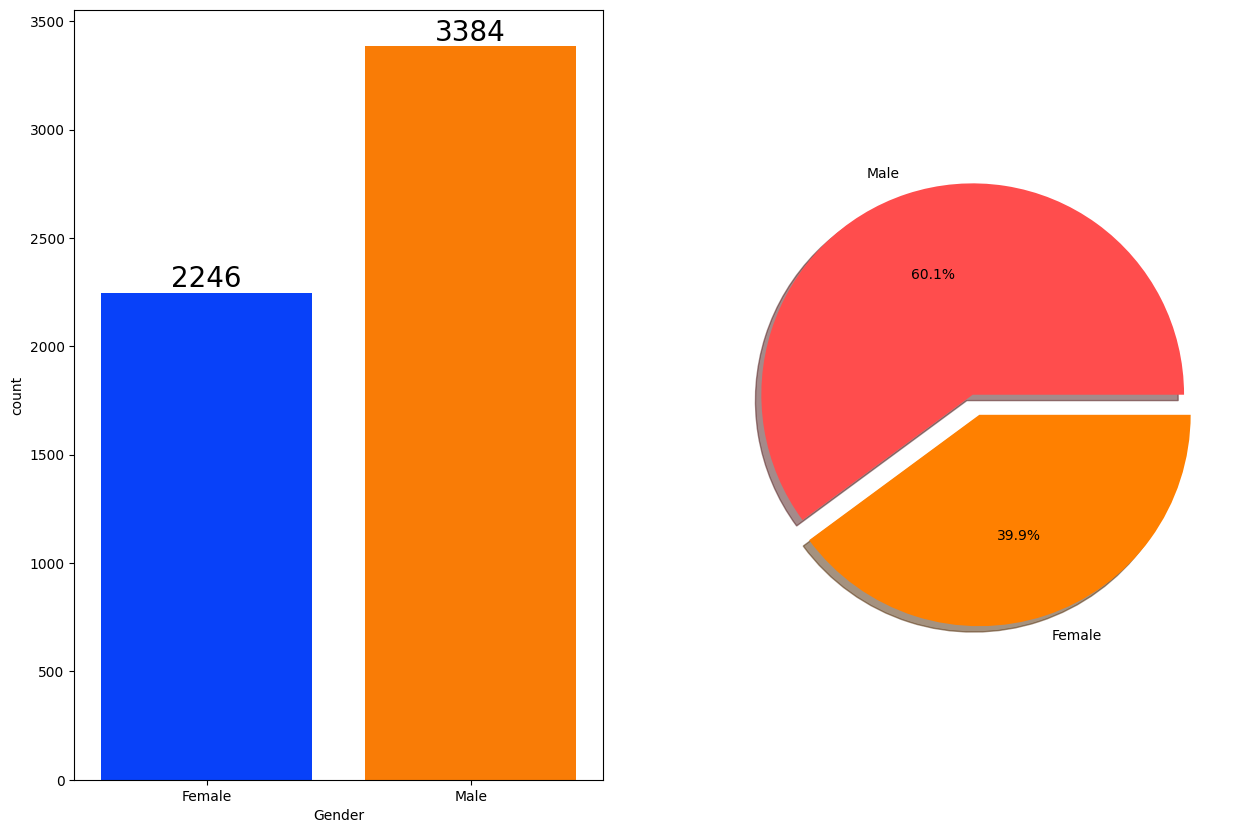

In [28]:
f,ax=plt.subplots(1,2,figsize=(15,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [29]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(data):
    categorical_column = data.select_dtypes(include=["object"]).columns

    one_hot_encoder = OneHotEncoder(sparse=False,handle_unknown="ignore")
    one_hot_encoded = one_hot_encoder.fit_transform(data[categorical_column])

    one_hot_encoded = pd.DataFrame(
        one_hot_encoded,columns=one_hot_encoder.get_feature_names_out(categorical_column)
    )

    data = data.drop(categorical_column,axis=1)

    data = pd.concat([data,one_hot_encoded],axis=1)
    return data

In [30]:
df1 = one_hot_encoding(df)

#### Checking the features are normally distributed or not

In [31]:
from scipy.stats import normaltest

numerical_columns = df.select_dtypes(include=np.number).columns
numerical_columns

gaussian_columns = []
non_gaussian_columns = []

for col in numerical_columns:
    stat , p = normaltest(df1[col])
    print("statistics=%.3f, p=%.3f" % (stat,p))

    alpha = 0.05

    if p > alpha:
        gaussian_columns.append(col)
    else:
        non_gaussian_columns.append(col)

print( gaussian_columns)


statistics=432.805, p=0.000
statistics=54831.638, p=0.000
statistics=2352.941, p=0.000
statistics=145.941, p=0.000
statistics=187.234, p=0.000
statistics=2713.033, p=0.000
statistics=861.410, p=0.000
statistics=2785.182, p=0.000
statistics=486.953, p=0.000
statistics=3186.180, p=0.000
statistics=2528.694, p=0.000
statistics=1462.443, p=0.000
statistics=925.547, p=0.000
statistics=1578.838, p=0.000
[]


##### Insight
* There are no normally distributed columns

#### Remove columns which are categorical and have less than 10 unique values 

In [32]:
# remove columns which are categorical and have less than 10 unique values 

col_to_remove = []
for col in df1.columns:
    if df1[col].nunique() < 10:
        col_to_remove.append(col)
print(len(col_to_remove))
data_for_skewness = df1.drop(col_to_remove,axis=1)
data_for_skewness

27


,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.000000,6.0,9,11.0,1.0,1.0,5.000000,160
1,10.189899,8.0,7,15.0,0.0,1.0,0.000000,121
2,10.189899,30.0,6,14.0,0.0,1.0,3.000000,120
3,0.000000,15.0,8,23.0,0.0,1.0,3.000000,134
4,0.000000,12.0,3,11.0,1.0,1.0,3.000000,130
...,...,...,...,...,...,...,...,...
5625,10.000000,30.0,6,18.0,1.0,2.0,4.000000,151
5626,13.000000,13.0,6,16.0,1.0,2.0,4.543491,225
5627,1.000000,11.0,3,21.0,1.0,2.0,4.000000,186
5628,23.000000,9.0,4,15.0,2.0,2.0,9.000000,179


In [33]:
def identify_skewed_cols(data):
    skewed_cols = []
    for col in data.columns:
        skew = data[col].skew()
        if skew > 1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_col = identify_skewed_cols(data_for_skewness)
len(skewed_col)

6

In [34]:
skewed_data = data_for_skewness[skewed_col]

In [35]:
skewed_data.head()

,WarehouseToHome,NumberOfAddress,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,6.0,9,1.0,1.0,5.0,160
1,8.0,7,0.0,1.0,0.0,121
2,30.0,6,0.0,1.0,3.0,120
3,15.0,8,0.0,1.0,3.0,134
4,12.0,3,1.0,1.0,3.0,130


In [36]:
def deal_with_outlier_with_iqr(df, col):
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df1[(df1[col] > upper_limit) | (df1[col] < lower_limit)]
    return outliers
cols_have_outliers_skewed = []
for col in skewed_col:
    outliers = deal_with_outlier_with_iqr(df1, col)
    shape = outliers.shape
    if shape[0] > 0:
        cols_have_outliers_skewed.append(col)
print(cols_have_outliers_skewed)  

['WarehouseToHome', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [37]:
def capping(data,col):
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    data.loc[data[col] > upper_limit , col] = upper_limit
    data.loc[data[col] < lower_limit , col] = lower_limit
    return data

for col in  cols_have_outliers_skewed:
    capped_data = capping(df1,col)
capped_data.shape

(5630, 35)

##### The dataset is immbalanced to convert the balanced dataset

#### To use the oversampling technique

In [38]:
#class count
count_class_0, count_class_1 = capped_data.Churn.value_counts()

# Divide by class 
df_class_0 = capped_data[capped_data['Churn'] == 0]
df_class_1 = capped_data[capped_data['Churn'] == 1]

In [39]:
df_class_0.shape

(4682, 35)

In [40]:
df_class_1.shape

(948, 35)

In [41]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(9364, 35)

In [42]:
df_test_over.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
26,8.000000,3,6.000000,3.0,3,4,2,0,13.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27,10.189899,3,12.000000,2.0,3,3,3,1,20.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28,18.000000,1,15.639896,2.0,3,4,9,0,18.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29,5.000000,3,14.000000,2.0,3,2,2,0,14.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30,2.000000,1,6.000000,2.0,3,3,2,0,13.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
df_test_over.to_csv(r"C:\Users\SAI DURGA PRASAD\Desktop\Customer churn prediction\notebook\data\processed_data.csv",index=False)